<h1 align="center">Deep Learning - Master in Deep Learning of UPM</h1> 

**IMPORTANTE**

Usaremos PyTorch Lightning para unificar arquitectura y lógica de entrenamiento en un único módulo:

In [35]:
# %%capture
# !pip install pytorch_lightning

En esta sesión implementaremos _from scratch_ un Transformer utilizando únicamente `PyTorch` para construir la arquitectura y `Lightning` para el entrenamiento.

In [140]:
import torch
import torch.nn as nn
import pytorch_lightning

# Tokenizador

## Character-level tokenizer

In [ ]:
class CharTokenizer:
    def __init__(self):
        self.vocab_size = 0
        self.str2tok = {}
        self.tok2str = {}

    @classmethod
    def from_data(cls, data):
        tokenizer = cls()

        vocab = ...
        tokenizer.vocab_size = len(vocab)

        tokenizer.str2tok = {c: t for t, c in enumerate(vocab)}
        tokenizer.tok2str = {t: c for t, c in enumerate(vocab)}

        return tokenizer

    def encode(self, text):
        _encode = lambda text: [self.str2tok[c] for c in text]

        if isinstance(text, list):
            return [_encode(s) for s in text]
        else:
            return _encode(text)
    
    def decode(self, tokens):
        return "".join([self.tok2str[t] for t in tokens])

In [155]:
char_tokenizer = CharTokenizer.from_data("To be, or not to be, that is the question.")

assert char_tokenizer.vocab_size == 16, "CharTokenizer vocab_size is not correct"
assert char_tokenizer.encode("To be") == [3, 10, 0, 5, 6], "CharTokenizer encode method is not working as expected"


## Word-level tokenizer


In [ ]:
class WordTokenizer(Tokenizer):
    @classmethod
    def from_data(cls, data):
        tokenizer = cls()

        vocab = ...
        tokenizer.vocab_size = len(vocab)

        tokenizer.str2tok = {w: i for i, w in enumerate(vocab)}
        tokenizer.tok2str = {i: w for w, i in tokenizer.str2tok.items()}

        return tokenizer

    def encode(self, text):
        return [self.str2tok[w] for w in text.split()]

    def decode(self, tokens):
        return " ".join([self.tok2str[t] for t in tokens])

In [167]:
word_tokenizer = WordTokenizer.from_data("To be, or not to be, that is the question.")

assert word_tokenizer.vocab_size == 9, "WordTokenizer vocab_size is not correct"
assert word_tokenizer.encode("that is the question.") == [6, 2, 7, 5], "WordTokenizer encode method is not working as expected"

¿Por qué el siguiente código nos da un error?

In [166]:
try:
    word_tokenizer.encode("question")
except KeyError as e:
    print(e)
    print("¿Por qué nos está dando un KeyError al tokenizar 'question'?")

'question'
¿Por qué nos está dando un KeyError al tokenizar 'question'?


## Subword-level tokenizer

In [168]:
# Train our own BPE tokenizer using sentencepiece
import sentencepiece
sentencepiece.SentencePieceTrainer.Train(
    input=data_path,
    model_prefix="bpe",
    vocab_size=1000,
    model_type="bpe",
)

# Load some pretrained tokenizer trained in some corpora
# import tiktoken
# bpe_tokenizer = tiktoken.get_encoding("gpt2")
# wordpiece_tokenizer = tiktoken.get_encoding("cl100k_base")
# sentencepiece_tokenizer = tiktoken.get_encoding("p50k_base")

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: data/shakespeare.txt
  input_format: 
  model_prefix: bpe
  model_type: BPE
  vocab_size: 1000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differ

Comparemos todos los tokenizadores anteriores (cambiad entre el corto y el largo)

In [173]:
# corpus = (
#     "To be, or not to be, that is the question.\n"
#     "Whether 'tis nobler in the mind to suffer\n"
#     "The slings and arrows of outrageous fortune."
# )

data_path = 'data/shakespeare.txt'
with open(data_path, 'r') as f:
    corpus = f.read()

# ---- 2) Instantiate tokenizers ----
char_tokenizer = CharTokenizer.from_data(corpus)
word_tokenizer = WordTokenizer.from_data(corpus)

# Use the sentencepiece tokenizer we trained above
subword_tokenizer = sentencepiece.SentencePieceProcessor(model_file="bpe.model")

# ---- 3) Tokenize the same text with each tokenizer ----
char_ids = char_tokenizer.encode(corpus)
word_ids = word_tokenizer.encode(corpus)
subword_ids = subword_tokenizer.encode(corpus)

# ---- 4) Print comparison ----
print("=== RAW TEXT ===")
print(corpus[:100])
print("\n")

print("=== CHARACTER-LEVEL TOKENIZER ===")
print(f"Vocab size        : {char_tokenizer.vocab_size}")
print(f"Sequence length   : {len(char_ids)} tokens")
print(f"First 40 token ids: {char_ids[:40]}")
print(f"Decoded           : {repr(char_tokenizer.decode(char_ids))}")
print("\n")

print("=== WORD-LEVEL TOKENIZER ===")
print(f"Vocab size        : {word_tokenizer.vocab_size}")
print(f"Sequence length   : {len(word_ids)} tokens")
print(f"First 20 token ids: {word_ids[:20]}")
print("Example word -> id mapping (first 10 words):")
for w, idx in list(word_tokenizer.str2tok.items())[:10]:
    print(f"  {repr(w)} -> {idx}")
print("\n")

print("=== SUBWORD-LEVEL TOKENIZER (GPT-2 BPE) ===")
print(f"Sequence length   : {len(subword_ids)} tokens")
print(f"First 20 token ids: {subword_ids[:20]}")
print(f"Decoded           : {repr(subword_tokenizer.decode(subword_ids))}")
print("\n")

print("=== SUMMARY (NUMBER OF TOKENS) ===")
print(f"Chars   : {len(char_ids)}")
print(f"Words   : {len(word_ids)}")
print(f"Subwords: {len(subword_ids)}")


=== RAW TEXT ===
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


=== CHARACTER-LEVEL TOKENIZER ===
Vocab size        : 65
Sequence length   : 1115394 tokens
First 40 token ids: [18, 47, 56, 57, 58, 1, 15, 47, 58, 47, 64, 43, 52, 10, 0, 14, 43, 44, 53, 56, 43, 1, 61, 43, 1, 54, 56, 53, 41, 43, 43, 42, 1, 39, 52, 63, 1, 44, 59, 56]
Decoded           : "First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you know Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us kill him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be done: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citizens, the patricians good.\nWhat authority surfeits on wou

# Embedding

## Implementación propia de Embedding
1. Inicialización de pesos (pensar en una matriz de tamaño `vocab_size x embedding_dim`).
2. Forward: indexar la matriz de pesos con los índices de las palabras.

In [ ]:
class MyEmbedding(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        ...

    def forward(self, token_ids):
        ...

Por supuesto, también podéis usar `nn.Embedding` de PyTorch directamente. Aunque para nuestro pequeño caso de uso ambas implementaciones serán equivalentes.

# Encoding Posicional

## Encoding Posicional Aprendido

La codificación posicional aprendida consiste en crear un `nn.Embedding` adicional que asigne a cada posición un vector de la misma dimensión que los embeddings de las palabras. Durante el forward, se suman ambos embeddings (el de las palabras y el posicional). De esta forma la capa Embedding aprende a representar las posiciones de las palabras en la secuencia.

In [ ]:
import torch.nn as nn

class LearnedPositionalEncoding(torch.nn.Module):
    def __init__(self, max_seq_len, embed_dim):
        super().__init__()
        self.position_embeddings = nn.Embedding(max_seq_len, embed_dim)

    def forward(self, x):
        batch_size, seq_len, _ = x.size() # x: batch_size x seq_len x embed_dim
        position_ids = ... # [0, 1, 2, ..., seq_len-1]
        position_ids = ... # add batch dim -> [[0, 1, 2, ..., seq_len-1], [0, 1, 2, ..., seq_len-1], ...]
        position_embeddings = ... # Get embeddings from the embedding table
        return ... # add position to embeddings

## Encoding Posicional Sinusoidal

La codificación sinusoidal permite que el modelo entienda relaciones relativas de manera eficiente, sin importar la longitud de la oración. Esto es clave porque el lenguaje se basa en patrones de relación más que en posiciones absolutas. Si un Transformer aprende que **el verbo suele estar después del sujeto, esta relación se mantendrá sin importar la posición exacta en la oración.** 

Si tomamos la ecuación del Positional Encoding:

$$
PE(pos, 2i) = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
$$

$$
PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
$$

Podemos ver que si queremos calcular el encoding de una posición desplazada \( pos+k \):

$$
PE(pos + k, 2i) = \sin\left(\frac{pos + k}{10000^{2i/d_{\text{model}}}}\right)
$$

$$
PE(pos + k, 2i+1) = \cos\left(\frac{pos + k}{10000^{2i/d_{\text{model}}}}\right)
$$

Usando propiedades trigonométricas como:

$$
\sin(A + B) = \sin A \cos B + \cos A \sin B
$$

$$
\cos(A + B) = \cos A \cos B - \sin A \sin B
$$

Esto nos permite expresar $ PE_{pos+k} $ **como una combinación lineal de $ PE_{pos} $**.

In [ ]:
class SinusoidalPositionalEncoding(torch.nn.Module):
    def __init__(self, max_seq_len, d_model, freq=10_000):
        super().__init__()
        pe = ... # Initialize with zeros [seq_len, model_dim]

        pos = ... # [[0], [1], [2], ...] (max_seq_len, 1)
        div_term = ... # e^(2i * -(log(freq) / d_model))

        pe[:, 0::2] = ... # PE(pos, 2i) = sin(pos / freq^(2i/d_model))
        pe[:, 1::2] = ... # PE(pos, 2i+1) = cos(pos / freq^(2i/d_model))

        pe = ... # add batch dimension

        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1), :]

In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

# Parámetros iniciales
max_seq_len = 100  # Número de posiciones en la oración
d_model = 16       # Dimensiones del embedding
freq = 10_000  # Frecuencia base

# Función para graficar interactivamente
def plot_positional_encoding(d=0, freq=10_000):
    pos = np.arange(max_seq_len) # seq_len
    pe = SinusoidalPositionalEncoding(max_seq_len, d_model, freq=freq).pe.squeeze(0).numpy() # seq_len x d_model

    plt.figure(figsize=(10, 3))

    # Graficar la dimensión seleccionada
    plt.plot(pos, pe[:, d], label=f'Sin d={d}', color='b') # sin(pos / freq^(2i/d_model))
    plt.plot(pos, pe[:, d+1], linestyle="dashed", label=f'Cos d={d+1}', color='r') # cos(pos / freq^(2i/d_model))
    
    plt.xlabel("Posición en la secuencia")
    plt.ylabel("Valor de Encoding")
    plt.title(f"Positional Encoding para dimensión {d} y {d+1}")
    plt.legend()
    plt.show()

# Interfaz interactiva con sliders
interact(plot_positional_encoding, 
         d=widgets.IntSlider(min=0, max=d_model-1, step=2, value=0, description="Dimensión"),
         freq=widgets.IntSlider(min=1000, max=20000, step=1000, value=freq, description="Frecuencia"))



interactive(children=(IntSlider(value=0, description='Dimensión', max=15, step=2), IntSlider(value=10000, desc…

<function __main__.plot_positional_encoding(d=0, freq=10000)>

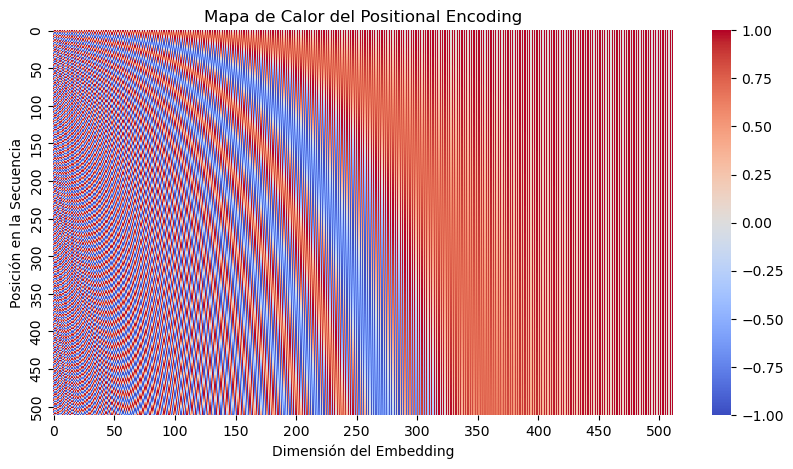

In [12]:
import seaborn as sns

# Parámetros iniciales
max_seq_len = 512  # Número de posiciones en la oración
d_model = 512      # Dimensiones del embedding
freq = 10_000  # Frecuencia base


pos = np.arange(max_seq_len) # seq_len
pe = SinusoidalPositionalEncoding(max_seq_len, d_model, freq=freq).pe.squeeze(0).numpy() # seq_len x d_model

# Graficar Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pe, cmap="coolwarm", xticklabels=50, yticklabels=50)
plt.xlabel("Dimensión del Embedding")
plt.ylabel("Posición en la Secuencia")
plt.title("Mapa de Calor del Positional Encoding")
plt.show()